# Genetic Algorithms for Trees

## Crossover
### Subtree exchange crossover
After two parent individuals have been selected, a subtree is randomly chosen in each of the parents. Next the two subtrees are exchanged resulting in two trees each of which is a different combination of the two parents.

In the binary expression tree encoding, we randomly select two operator nodes or two leafs

In [168]:
# given 2 binary expression trees, we will perform subtree exchange crossover assuming we 
# already have chosen these individuals for crossover

# first select 1 node in each parent with uniform probability

# types of allowable pairs:
# leaf -- leaf (swap individual kernels)
# non-leaf -- non-leaf (swap kernel expression)

# leaf -- non-leaf pair is not alloweable

import numpy as np
from graphviz import Digraph
import copy

operators = ['+', '*']

infix_expression_1 = "RQ1 + RQ2 * SE2 + RQ1 + SE2 * RQ2"
postfix = infix_to_postfix(infix_expression)
tree_1 = postfix_to_binexp_tree(postfix)
postfix_tokens_1 = postfix.split(' ')
postfix_tokens_1

['RQ1', 'RQ2', 'SE2', '*', '+', 'RQ1', '+', 'SE2', 'RQ2', '*', '+']

In [167]:
infix_expression_2 = "SE2 * RQ1 * RQ1 * RQ3 + SE3"
postfix = infix_to_postfix(infix_expression)
tree_2 = postfix_to_binexp_tree(postfix)
postfix_tokens_2 = postfix.split(' ')
postfix_tokens_2

['SE2', 'RQ1', '*', 'RQ1', '*', 'RQ3', '*', 'SE3', '+']

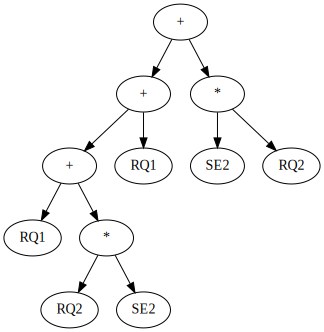

In [170]:
create_graph(tree_1.root, Digraph(comment='Binary Expression Tree'))

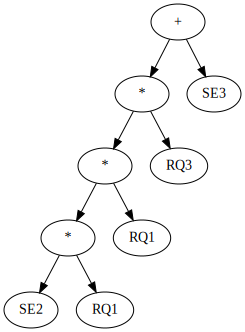

In [104]:
create_graph(tree_2.root, Digraph(comment='Binary Expression Tree'))

In [171]:
def valid_pair(postfix_tokens_a, postfix_tokens_b, r1, r2):
    if postfix_tokens_a[r1] in operators and postfix_tokens_b[r2] in operators:
        return True
    elif postfix_tokens_a[r1] not in operators and postfix_tokens_b[r2] not in operators:
        return True
    
    return False

def select_token_ind(postfix_tokens_1, postfix_tokens_2):
    r1 = np.random.randint(0, len(postfix_tokens_1))
    r2 = np.random.randint(0, len(postfix_tokens_2))
    while not valid_pair(postfix_tokens_1, postfix_tokens_2, r1, r2):
        r1 = np.random.randint(0, len(postfix_tokens_1))
        r2 = np.random.randint(0, len(postfix_tokens_2))
    return r1, r2

r1, r2 = select_token_ind(postfix_tokens_1, postfix_tokens_2)

postfix_tokens_1[r1], r1, postfix_tokens_2[r2], r2

('*', 9, '*', 4)

In [172]:
# select nodes in tree
node_1 = select_postorder(tree_1.root, r1)
node_2 = select_postorder(tree_2.root, r2)

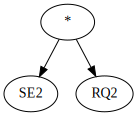

In [175]:
create_graph(node_1, Digraph())

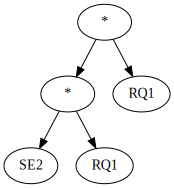

In [176]:
create_graph(node_2, Digraph())

In [177]:
# swap parents of nodes
node_1_cp = copy.copy(node_1)
node_2_cp = copy.copy(node_2)

node_1_parent_cp = node_1_cp.parent
node_2_parent_cp = node_2_cp.parent

# find out if node is left or right child
if node_1_parent_cp:
    if node_1_parent_cp.left is node_1:
        print('node 1 is a left child')
        node_1.parent.left = node_2_cp
    elif node_1_parent_cp.right is node_1:
        print('node 1 is a right child')
        node_1.parent.right = node_2_cp
else:
    print('node 1 is a root')

if node_2_parent_cp:
    if node_2_parent_cp.left is node_2:
        print('node 2 is a left child')
        node_2.parent.left = node_1_cp
    elif node_2_parent_cp.right is node_2:
        print('node 2 is a right child')
        node_2.parent.right = node_1_cp
else:
    print('node 2 is a root')
    
node_1.parent = node_2_parent_cp
node_2.parent = node_1_parent_cp

node 1 is a right child
node 2 is a left child


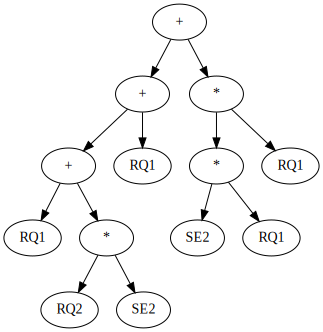

In [178]:
create_graph(tree_1.root, Digraph())

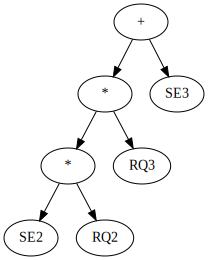

In [179]:
create_graph(tree_2.root, Digraph())

In [186]:
print(infix_expression_1, '--->', infix(tree_1.root))

RQ1 + RQ2 * SE2 + RQ1 + SE2 * RQ2 ---> (((RQ1+(RQ2*SE2))+RQ1)+((SE2*RQ1)*RQ1))


In [187]:
print(infix_expression_2, '--->', infix(tree_2.root))

SE2 * RQ1 * RQ1 * RQ3 + SE3 ---> (((SE2*RQ2)*RQ3)+SE3)


### imported code from other module

In [180]:
class TreeNode():
    def __init__(self, value, parent=None):
        self.value = value
        self.parent = parent
        self.children = []
    
    def children():
        return self.children
    
    def get_parent():
        return self.parent()
    
    def get_child_count():
        return len(self.children)
    
    def __str__(self):
        return str(self.value)

class BinaryTreeNode(TreeNode):
    
    def __init__(self, value, parent=None):
        super().__init__(value, parent)
        
        self.left = None
        self.right = None
        
    def add_left(self, val):
        self.left = BinaryTreeNode(val, self)
        return self.left
    
    def add_right(self, val):
        self.right = BinaryTreeNode(val, self)
        return self.right
    
    def __str__(self):
        return str(self.value)

class BinaryTree():
    
    def __init__(self):
        self.root = None
        

def postfix_to_binexp_tree(postfix):
    tree = BinaryTree()
    
    postfix_tokens = postfix.split()
    root = BinaryTreeNode(postfix_tokens.pop())
    tree.root = root

    curr = root
    for token in postfix_tokens[::-1]:
        # while curr can't have more children
        while curr.value not in operators or (curr.right is not None and curr.left is not None):
            curr = curr.parent

        if curr.right is None:
            node = curr.add_right(token)
        elif curr.left is None:
            node = curr.add_left(token)
        curr = node

    return tree

def infix_to_postfix(infix_expression):
    # tokenize
    infix_tokens = infix_expression.split()
    
    pemdas = {}
    pemdas["*"] = 3
    pemdas["+"] = 1
    pemdas["("] = 0

    operator_stack = []
    postfix_list = []
    for token in infix_tokens:
        if token in operators:
            while len(operator_stack) is not 0 and pemdas[operator_stack[-1]] >= pemdas[token]:
                postfix_list.append(operator_stack.pop())
            operator_stack.append(token)
        elif token == '(':
            operator_stack.append(token)
        elif token == ')':
            top_tkn = operator_stack.pop()
            while top_tkn != '(':
                postfix_list.append(top_tkn)
                top_tkn = operator_stack.pop()
        else:
            # token is an operand
            postfix_list.append(token)

    while len(operator_stack) > 0:
        postfix_list.append(operator_stack.pop())

    return " ".join(postfix_list)

def create_graph(root, graph):
    if root is not None:
        root_id = str(id(root))
        graph.node(root_id, label=root.value)
        
        if root.left is not None:
            left = root.left
            left_id = str(id(left))
            graph.node(left_id, label=left.value)
            graph.edge(root_id, left_id)
            create_graph(root.left, graph)
        if root.right is not None:
            right = root.right
            right_id = str(id(right))
            graph.node(right_id, label=right.value)
            graph.edge(root_id, right_id)
            create_graph(root.right, graph)
            
    return graph

def infix(root, expression=None):
    if expression is None:
        expression = ''
    
    if root is not None:
        if root.value in operators:
            expression += '('
            
        expression += infix(root.left)
        expression += root.value
        expression += infix(root.right)
        
        if root.value in operators:
            expression += ')'
    
    return expression

def select_postorder(root, node_idx):
    ''' Select node from binary tree given postorder index
    '''
    node = root
    stack = []
    last_node_visited = None
    i = 0
    while len(stack) > 0 or node is not None:
        if node:
            stack.append(node)
            node = node.left
        else:
            peek_node = stack[-1]
            if peek_node.right is not None and last_node_visited is not peek_node.right:
                node = peek_node.right
            else:
                if i == node_idx:
                    return peek_node
                last_node_visited = stack.pop()
                i += 1
                
    return None

## Mutation
### Subtree replacement mutation 
We select a subtree in the individual to which it is applied and replaces the subtree with a randomly created tree. This subtree is usually created using one of the initialization methods (grow method or Ramped Half-and-Half method).

In [511]:
infix_expression_1 = "RQ1 + RQ2 * SE2 + RQ1 + SE2 * RQ2"
postfix = infix_to_postfix(infix_expression)
tree_1 = postfix_to_binexp_tree(postfix)
postfix_tokens_1 = postfix.split(' ')
postfix_tokens_1

['RQ1', 'RQ2', 'SE2', '*', '+', 'RQ1', '+', 'SE2', 'RQ2', '*', '+']

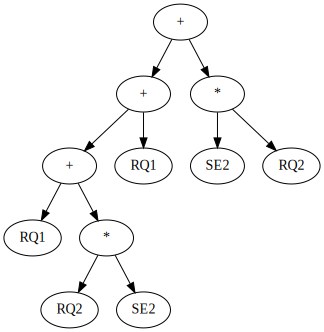

In [512]:
create_graph(tree_1.root, Digraph())

### Grow Method

In [513]:
r = np.random.randint(0, len(postfix_tokens_1))
node = select_postorder(tree_1.root, r)
postfix_tokens_1[r], r

('RQ1', 5)

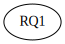

In [514]:
create_graph(node, Digraph())

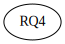

In [515]:
# grow a random tree
def grow(depth, max_depth=2):
    terminals = ['SE1', 'SE2', 'SE3', 'SE4', 'RQ1', 'RQ2', 'RQ3', 'RQ4']
    internals = operators
    # 2 children for binary trees
    n_children = 2
    if depth < max_depth:
        node = BinaryTreeNode(np.random.choice(terminals + internals))
        
        if node.value in internals:
            for i in range(0, n_children):
                child_i = grow(depth + 1)
                if not node.left:
                    node.left = child_i
                    node.left.parent = node
                elif not node.right:
                    node.right = child_i
                    node.right.parent = node
    else:
        node = BinaryTreeNode(np.random.choice(terminals))
        
    return node

random_tree = grow(0)
create_graph(random_tree, Digraph())

### Ramped Half-and-Half Method

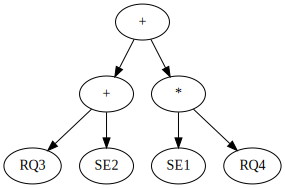

In [508]:
# grow a random tree
def full(depth, max_depth=2):
    terminals = ['SE1', 'SE2', 'SE3', 'SE4', 'RQ1', 'RQ2', 'RQ3', 'RQ4']
    internals = operators
    # 2 children for binary trees
    n_children = 2
    if depth < max_depth:
        node = BinaryTreeNode(np.random.choice(internals))
        
        if node.value in internals:
            for i in range(0, n_children):
                child_i = full(depth + 1)
                if not node.left:
                    node.left = child_i
                    node.left.parent = node
                elif not node.right:
                    node.right = child_i
                    node.right.parent = node
    else:
        node = BinaryTreeNode(np.random.choice(terminals))
        
    return node

random_tree = full(0)
create_graph(random_tree, Digraph())

node is a right child


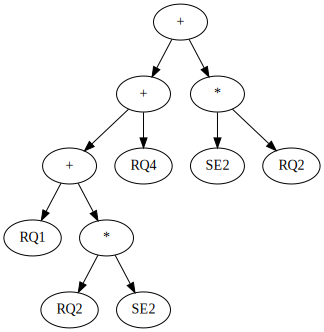

In [516]:
# add mutated subtree to original 
# swap parents of nodes
if node.parent:
    if node.parent.left is node:
        print('node is a left child')
        node.parent.left = random_tree
    elif node.parent.right is node:
        print('node is a right child')
        node.parent.right = random_tree
else:
    print('node is a root')
    
random_tree.parent = node.parent

create_graph(tree_1.root, Digraph())

In [517]:
print(infix(tree_1.root))

(((RQ1+(RQ2*SE2))+RQ4)+(SE2*RQ2))


## Point mutation

In [518]:
infix_expression_1 = "RQ1 + RQ2 * SE2 + RQ1 + SE2 * RQ2"
postfix = infix_to_postfix(infix_expression)
tree_1 = postfix_to_binexp_tree(postfix)
postfix_tokens_1 = postfix.split(' ')
postfix_tokens_1

['RQ1', 'RQ2', 'SE2', '*', '+', 'RQ1', '+', 'SE2', 'RQ2', '*', '+']

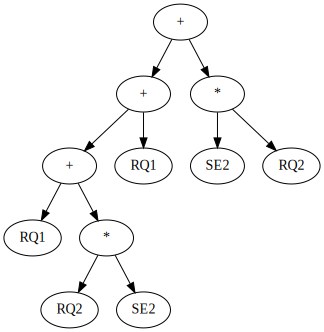

In [519]:
create_graph(tree_1.root, Digraph())

In [601]:
r = np.random.randint(0, len(postfix_tokens_1))
node = select_postorder(tree_1.root, r)
postfix_tokens_1[r], r

('+', 10)

In [603]:
kernels = ['SE1', 'SE2', 'SE3', 'SE4', 'RQ1', 'RQ2', 'RQ3', 'RQ4']

# change node value to a different value
if node.value in kernels:
    new_val = np.random.choice(list(set(kernels) - set([node.value])))
elif node.value in operators:
    new_val = np.random.choice(list(set(operators) - set([node.value])))
    
node.value = new_val
new_val

'*'

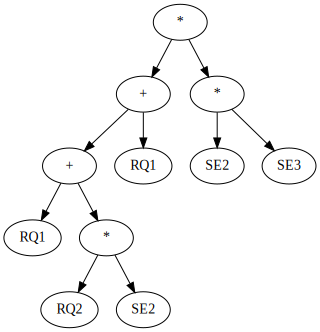

In [604]:
create_graph(tree_1.root, Digraph())